# Multi Class Classification

## Data Set: MNIST

#### *Classify the handwritten image of digit to a correct category between 0 to 9*

In [1]:
from keras.datasets import mnist

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [0]:
import matplotlib.pyplot as plt

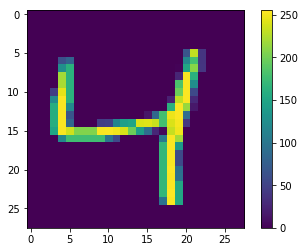

In [10]:
#Visualize the dataset
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False);

In [11]:
train_labels[2]

4

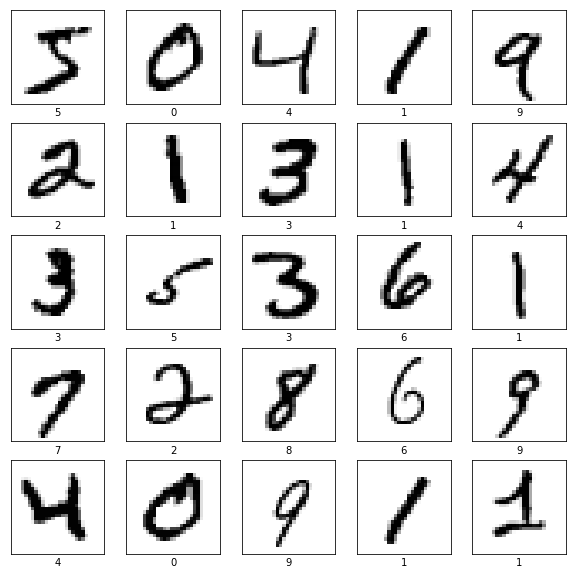

In [13]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap =plt.cm.binary)
  plt.xlabel(train_labels[i]);

# Preparing the Data

In [0]:
'''
Pre-Process the data by changing the shape of Input(train_images and test_images)
We have the dimension of train_images as (60000,28,28)
    - Each input is of shape(28,28)
          But to be able to use it in our Neural network as input, we have to convert
      into a single long vector, so that it can be used as reference for input shape
      for neural network
      
 This Process is known as Flattening
 
 So We convert to --> in the form of (60000, 28*28) from (60000,28,28)  and (10000,28*28) from (10000,28,28)
 for train_images and test_images respectively


'''


train_images = train_images.reshape((60000,28*28))
test_images = test_images.reshape((10000,28*28))

In [15]:
train_images.shape, test_images.shape

((60000, 784), (10000, 784))

In [16]:
train_images[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [0]:
'''
Scaling the values in the input between 0 and 1.
Currently input values range between 0 to 255
'''
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [18]:
train_images[2]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

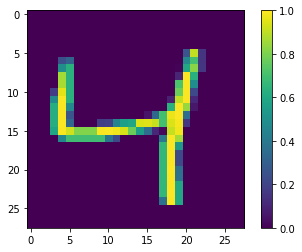

In [19]:
plt.figure()
plt.imshow(train_images[2].reshape(28,28)) # Reshape Because we had flattened it earlier
plt.colorbar()
plt.grid(False);

### One Hot Encoding

In [20]:
train_labels[2]

4

In [0]:
#To convert the values to one-hot encoding vectors we have an inbuilt function called to_categorical

In [0]:
from keras.utils import to_categorical

In [0]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [29]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [31]:
train_labels.shape

(60000, 10)

In [30]:
train_labels[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

# Building the network

In [0]:
#Making the code results reproducible
import numpy as np
import tensorflow as tf
import random as rn

np.random.seed(42)
rn.seed(12345)
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)
from keras import backend as K

tf.set_random_seed(1234)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [0]:

from keras import models
from keras import layers
from keras import optimizers
from keras import losses

In [0]:
network = models.Sequential()
network.add(layers.Dense(256,activation = 'relu',input_shape = (train_images.shape[1],)))
network.add(layers.Dense(256,activation = 'relu'))
network.add(layers.Dense(10,activation = 'softmax'))

In [38]:
#Configuring the Network
network.compile(optimizer = optimizers.RMSprop(),
               loss = losses.categorical_crossentropy,
               metrics = ['accuracy'])

W0701 15:29:24.737278 140239486216064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0701 15:29:24.755712 140239486216064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
#Separating the Training set and Validation set
x_val = train_images[:10000]
x_partial_train = train_images[10000:]
y_val = train_labels[:10000]
y_partial_train = train_labels[10000:]

In [40]:
x_val.shape,x_partial_train.shape

((10000, 784), (50000, 784))

In [41]:
y_val.shape,y_partial_train.shape

((10000, 10), (50000, 10))

In [42]:
#Perform the fit
network.fit(x_partial_train,
           y_partial_train,
           epochs = 10,
           batch_size = 128,
           validation_data = (x_val,y_val))

W0701 15:32:46.822318 140239486216064 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0701 15:32:46.949644 140239486216064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 87us/step - loss: 0.2680 - acc: 0.9195 - val_loss: 0.1390 - val_acc: 0.9572
Epoch 2/10
50000/50000 [==============================] - 3s 69us/step - loss: 0.1043 - acc: 0.9679 - val_loss: 0.0923 - val_acc: 0.9733
Epoch 3/10
50000/50000 [==============================] - 3s 67us/step - loss: 0.0687 - acc: 0.9786 - val_loss: 0.0809 - val_acc: 0.9757
Epoch 4/10
50000/50000 [==============================] - 3s 67us/step - loss: 0.0490 - acc: 0.9850 - val_loss: 0.1047 - val_acc: 0.9703
Epoch 5/10
50000/50000 [==============================] - 3s 69us/step - loss: 0.0374 - acc: 0.9884 - val_loss: 0.0978 - val_acc: 0.9735
Epoch 6/10
50000/50000 [==============================] - 3s 68us/step - loss: 0.0269 - acc: 0.9912 - val_loss: 0.0860 - val_acc: 0.9784
Epoch 7/10
50000/50000 [==============================] - 3s 68us/step - loss: 0.0223 - acc: 0.9929 - val_loss: 0.0861 - val_acc

In [43]:
test_loss, test_acc = network.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 30us/step


In [46]:
test_loss

0.09513955911089202

In [47]:
test_acc

0.9798